## Importando Utilitários

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from PrettyPrint import PrettyPrintTree
from morpho_package import *

array([[7, 5, 6, 5, 5],
       [5, 6, 6, 7, 6],
       [6, 7, 6, 7, 5],
       [5, 5, 6, 7, 5],
       [7, 6, 7, 7, 7]])

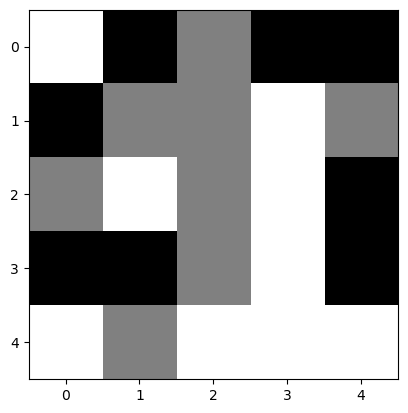

In [2]:
np.random.seed(3)
img = np.random.randint(5, 8, (5, 5))
plt.imshow(img, 'gray', )
img

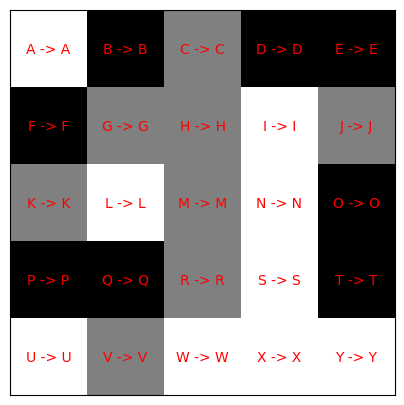

In [3]:
teste = ComponentTree(img, Adjacency8())
teste.showParents()
# teste.sorted_pixels = np.array([
#         13,  8,  4, 20, 16,
#         21, 14,  7,  0, 23,
#         19, 15, 12,  2, 24,
#          6,  1, 22, 18, 17,
#         11,  5, 10,  9,  3
# ]) # Esse vetor de pixels ordenados é usado apenas para comparação com o resultado da lib skimage

### Computar árvore de componentes

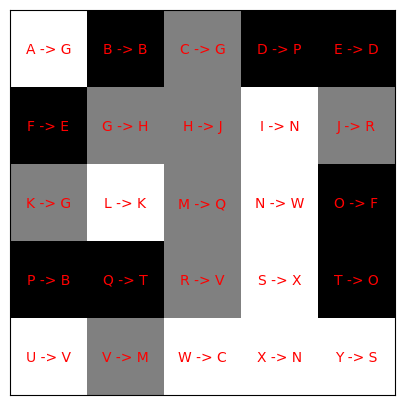

In [4]:
teste.computeTree()
teste.showParents()

### Canonizar pixels

'Pixels Canônicos: [1, 12, 20, 22, 0, 11]'

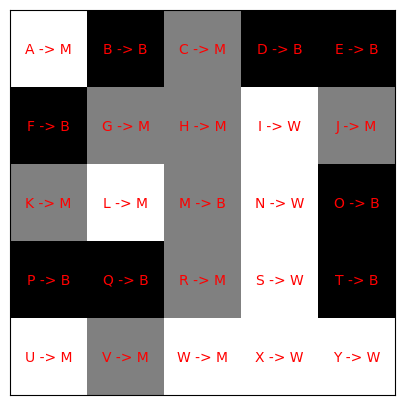

In [5]:
teste.canonize()
teste.showParents()
f'Pixels Canônicos: {teste.canonical_pixels}'

In [6]:
# # Apenas para comparação
# from skimage.morphology import max_tree
# P, S = max_tree(img, connectivity=8)
# showParents(img, S, P)
# P, S

In [7]:
nodes = {}

for c_index in teste.canonical_pixels:
    if c_index not in nodes.keys():
        c_point = teste.pixel_indexer.index_to_coord(c_index)
        level = teste.image[c_point.row, c_point.col]

        if teste.parent[c_index] == c_index:
            nodes[c_index] = Node(level, c_index)

        else:
            c_parent = teste.parent[c_index]
            nodes[c_index] = Node(level, c_index, nodes[c_parent])
            nodes[c_parent].addChildren(nodes[c_index])

In [8]:
pt = PrettyPrintTree(lambda x: x.childrens.values(), lambda x: x.getInfo())
pt(nodes[1])

                               Representant: 1      
                               Parent: 1            
                               CNPs: []             
                               Children Nodes: [12] 
                                        |
                         Representant: 12                
                         Parent: 1                       
                         CNPs: []                        
                         Children Nodes: [20, 22, 0, 11] 
         ┌────────────────────┬─────────┴──────────┬────────────────────┐
 Representant: 20     Representant: 22     Representant: 0      Representant: 11   
 Parent: 12           Parent: 12           Parent: 12           Parent: 12         
 CNPs: []             CNPs: []             CNPs: []             CNPs: []           
 Children Nodes: []   Children Nodes: []   Children Nodes: []   Children Nodes: [] 
